# Read data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline


In [2]:
df = pd.read_csv("Caterpillar/run-.-tag-1_iou_loss.csv")

In [51]:
df.head(10)["Wall time"][0]

1615518754.574468

In [76]:
df.head(10)["Wall time"][1] - df.head(10)["Wall time"][0]

5.2386391162872314

In [81]:
df["Wall time"].diff()

0           NaN
1      5.238639
2      0.683744
3      6.023193
4      5.279035
         ...   
995    3.621453
996    1.820955
997    2.099067
998    1.618116
999    0.208759
Name: Wall time, Length: 1000, dtype: float64

In [73]:
wall_time = np.array(df["Wall time"]).astype(np.float64)
wall_time_minus = np.array([wall_time[0]] + list(df["Wall time"][1:1001])).astype(np.float64)

In [74]:
a  =wall_time - wall_time_minus

In [75]:
a[-1]

0.0

In [11]:
import time

In [17]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1615518754.574468))


'2021-03-11 19:12:34'

In [37]:
1615518759.813107 - 1615518754.574468

5.2386391162872314

In [36]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1615518759.813107))


'2021-03-11 19:12:39'

In [82]:
from sklearn import preprocessing

def plot_metrics(experiment_names, metric="run-.-tag-1_loss", y_axis="Normalized Loss", title="Normalized Total Loss"):
    min_max_scaler = preprocessing.MinMaxScaler()
    metric_dfs = {experiment:pd.read_csv("{}/{}.csv".format(experiment,metric)) for experiment in experiment_names}
    steps = metric_dfs["MiniCastle"]["Step"]
    d = {df:metric_dfs[df]["Value"] for df in metric_dfs}
    wall_time_d = {df:metric_dfs[df]["Wall time"] for df in metric_dfs}
    new_df = pd.DataFrame(d)
    wall_time_df = pd.DataFrame(wall_time_d)
    x = min_max_scaler.fit_transform(new_df.values)
    new_df = pd.DataFrame(x)
    new_df.columns = experiment_names
    d = new_df.to_dict()
    d["Step"] = steps
    new_df = pd.DataFrame(d)
    new_df = new_df.set_index("Step")
    # round down because we stopped training before
    new_df["PlainBlacksmith"][new_df["PlainBlacksmith"].index > 10000] = 0.000
    fig, ax = plt.subplots(figsize=(32, 16))

    plt.ylabel(y_axis)
    plt.title(title)
    line_plot = sns.lineplot(data=new_df, dashes = False)
#     ax.legend(experiment_names)
    ax.figure.savefig('./{}.png'.format(y_axis.replace(" ","-")))
    
    wall_time_df = wall_time_df.diff()
    return new_df, wall_time_df.mean()

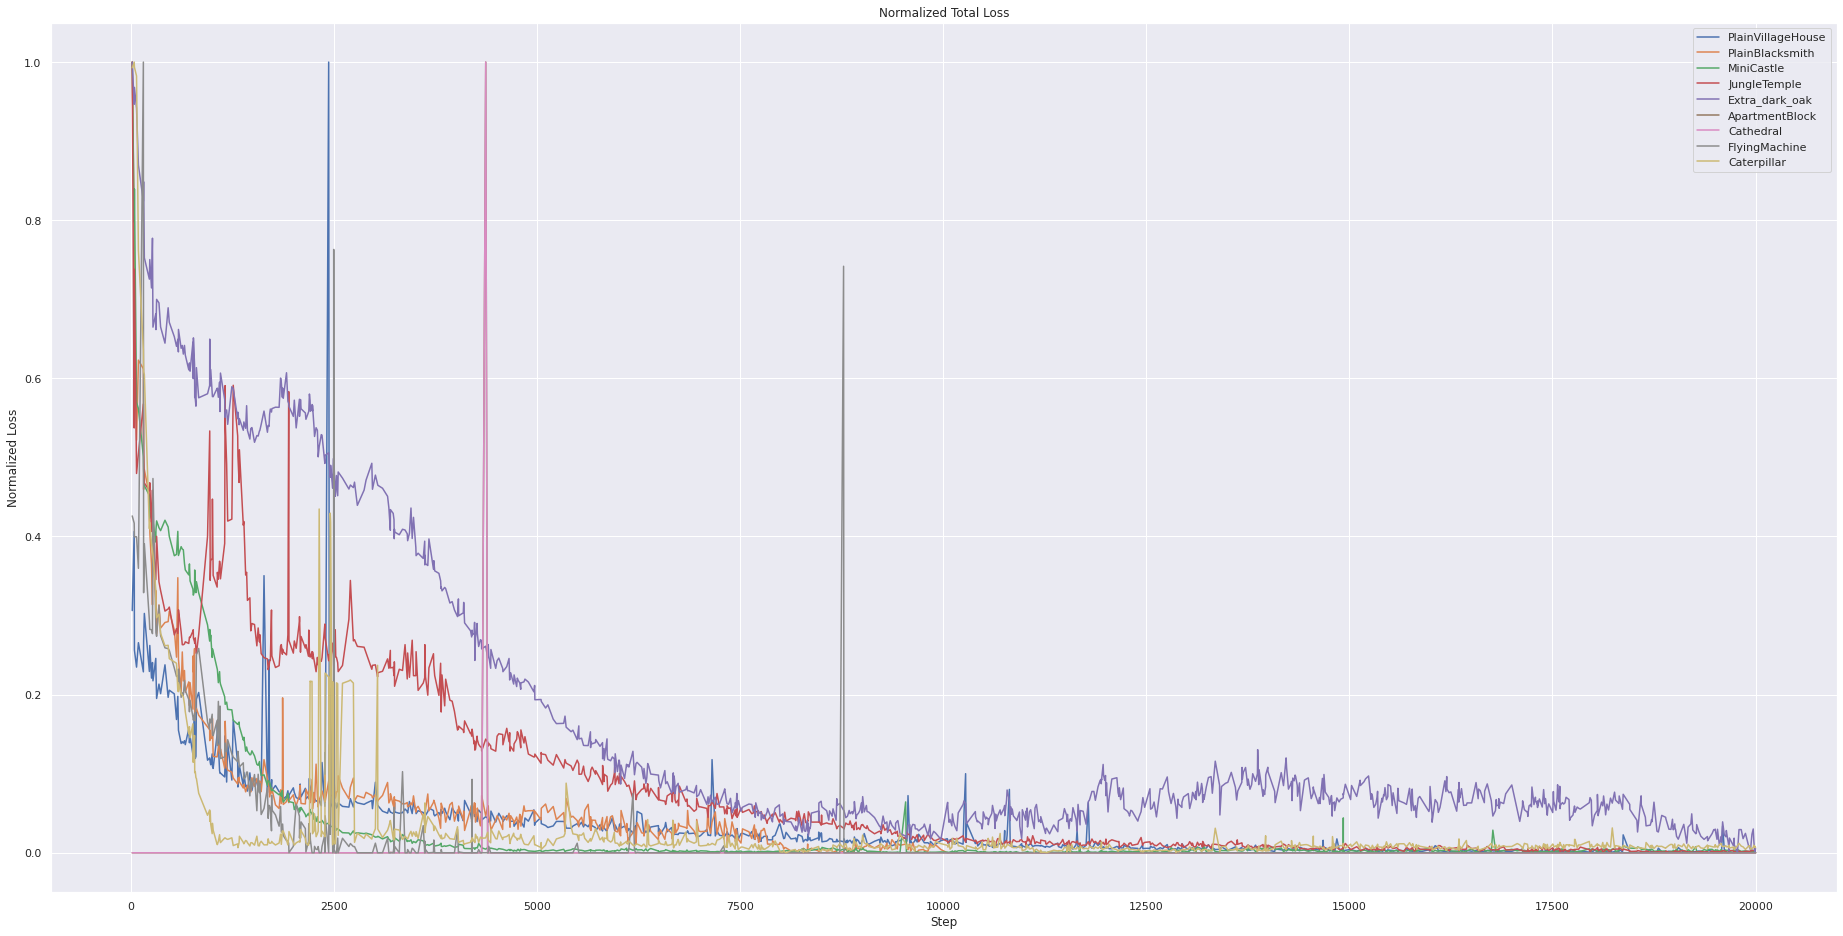

In [83]:
loss_df, t = plot_metrics(["PlainVillageHouse", "PlainBlacksmith", "MiniCastle", "JungleTemple", "Extra_dark_oak", "ApartmentBlock", "Cathedral", "FlyingMachine", "Caterpillar"])

In [84]:
t

PlainVillageHouse     2.383396
PlainBlacksmith       1.822390
MiniCastle           21.731658
JungleTemple         19.681482
Extra_dark_oak       78.085459
ApartmentBlock       30.715275
Cathedral            30.715275
FlyingMachine         3.903240
Caterpillar           5.340317
dtype: float64

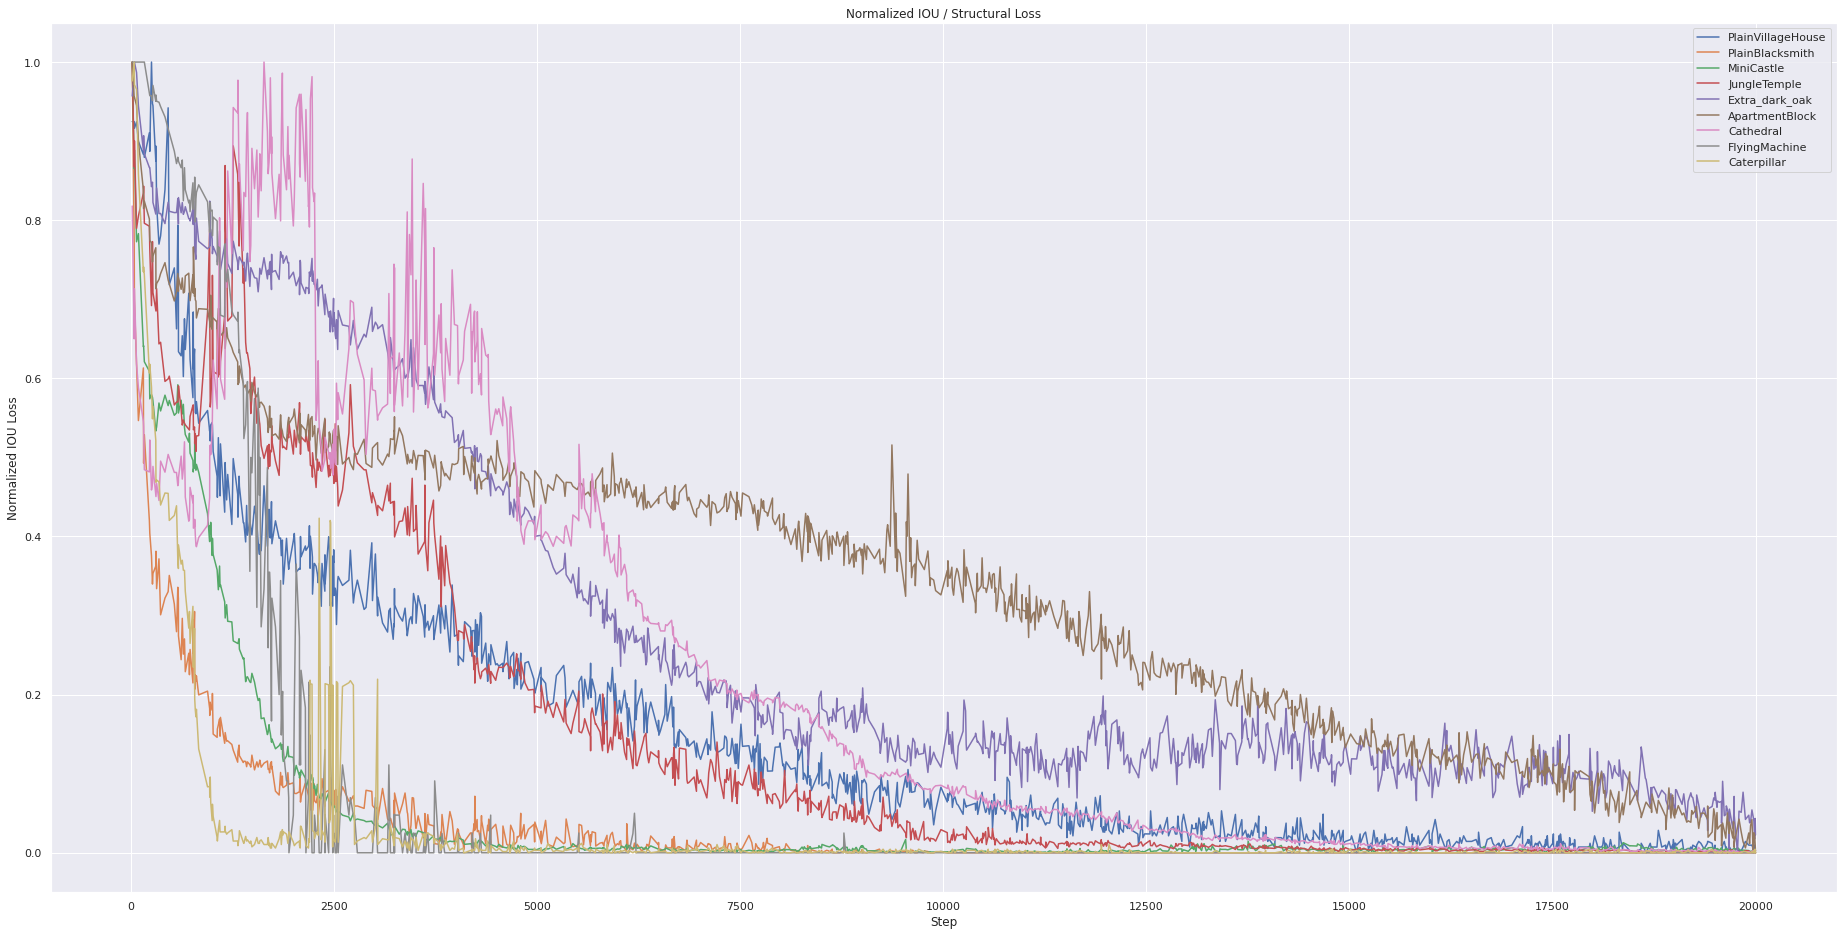

In [50]:
iou_df = plot_metrics(["PlainVillageHouse", "PlainBlacksmith", "MiniCastle", "JungleTemple", "Extra_dark_oak", "ApartmentBlock", "Cathedral", "FlyingMachine", "Caterpillar"], metric="run-.-tag-1_iou_loss", y_axis="Normalized IOU Loss", title="Normalized IOU / Structural Loss")